# Optymalizacja (naiwny algorytm)

In [1]:
#liczenie pochodnych
import sympy as sp
xs, ys = sp.symbols('x y')
fs = (1-xs)**2 + 100*(ys-xs**2)**2
print(sp.diff(fs, xs), sp.diff(fs, ys), sep="\n")

-400*x*(-x**2 + y) + 2*x - 2
-200*x**2 + 200*y


<IPython.core.display.Javascript object>


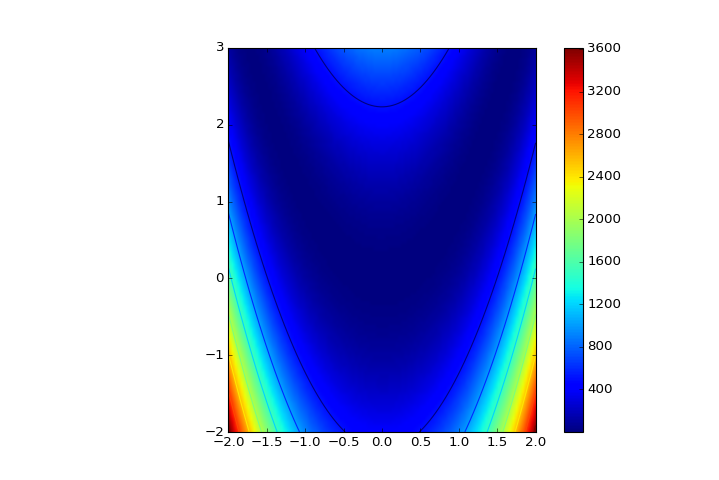

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

def funkcja(r):
    x, y = r
    return (1-x)**2 + 100*(y-x**2)**2

def pochodna(r):
    x, y = r
    dr = 0.001
    return np.array([-400*x*(-x**2 + y) + 2*x - 2,
                     -200*x**2 + 200*y])
                     

x = np.linspace(-2,2,100)
y = np.linspace(-2,3,100)
X, Y = np.meshgrid(x,y)
F = (1-X)**2 + 100*(Y-X**2)**2
fig, axes = plt.subplots()

CP = axes.contour(X, Y, F)
IM = axes.imshow(F, extent=(min(x),max(x),min(y),max(y)), origin='lower')
plt.colorbar(IM)

<IPython.core.display.Javascript object>


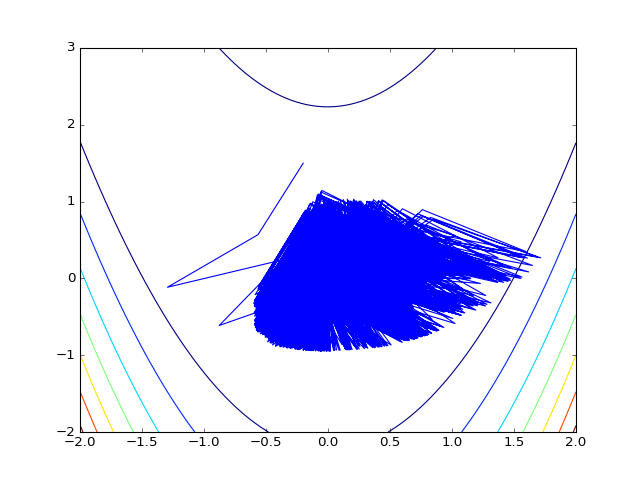

In [9]:
def find_minimum(r0, dr, max_iterations, r_tolerance, f_tolerance):
    r = np.asarray(r0)
    f = funkcja(r)
    
    r_lista=np.zeros((max_iterations,2))
    for i in range(max_iterations):
        r_lista[i]=r
        delta_r = -pochodna(r)
        delta_r *= dr
        delta_r /= np.linalg.norm(delta_r)
        r = r + delta_r
        new_f = funkcja(r)
        delta_f = abs(new_f - f)
        f = new_f
        if np.linalg.norm(delta_r) < r_tolerance or delta_f < f_tolerance:
            print("skończył")
            r_lista = r_lista[:i+1]
            break
    return r, r_lista

r_min, r_lista = find_minimum([-0.2,1.5], 0.001, 5000, 0.01, 0.01)

fig2, axes2 = plt.subplots()
axes2.contour(X, Y, F)
axes2.plot(r_lista[:,0], r_lista[:,1])

# Bisekcja, Newton - szukanie pierwiastków

a 4, b -4
srodek 0.0, f_srodek -4.0
a 0.0, b -4
pierwiastek w -2.0
a 0.0, b -4


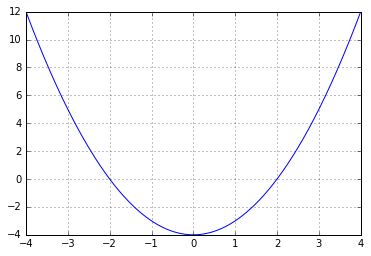

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def f(x):
    return x**2 - 4

x_dolny = -4
x_gorny = 4
x = np.linspace(x_dolny, x_gorny, 1000)

y = f(x)
plt.grid()
plt.plot(x, y)

a = x_dolny
b = x_gorny
if b > a:
    a, b = b, a
f_a = f(a)
f_b = f(b)

dokladnosc = 0.0001
while(abs(a-b)>dokladnosc):
    print("a {}, b {}".format(a, b))
    srodek = (a+b)/2
    f_srodek = f(srodek)
    if (f_srodek > 0):
        a, b = a, srodek
        f_a, f_b = f_a, f_srodek
    elif (f_srodek == 0):
        print ("pierwiastek w {}".format(srodek))
        break
    else:
        a, b = srodek, b
        f_a, f_b = f_srodek, f_b
    print("srodek {}, f_srodek {}".format(srodek, f_srodek))
print("a {}, b {}".format(a, b))

4 12
2.5 2.25
2.05 0.20249999999999968
2.000609756097561 0.002439396192741583
2.0000000929222947 3.716891878724482e-07


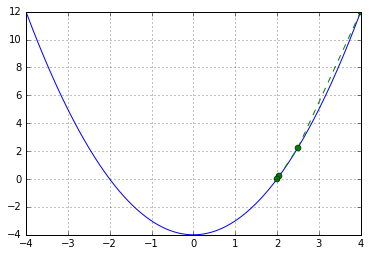

In [2]:
def fprime(x):
    return 2*x

# def fprime(x):
#     dx = 0.01
#     return (f(x+dx) - f(x-dx))/(2*dx)

x_trial = 4
f_trial = f(x_trial)
lista_x = []
lista_y = []
while(abs(f_trial) > dokladnosc):
    print(x_trial, f_trial)
    lista_x.append(x_trial)
    lista_y.append(f_trial)
    fprime_trial = fprime(x_trial)
    delta_x = -f_trial/fprime_trial
    x_trial = x_trial + delta_x
    f_trial = f(x_trial)

print(x_trial, f_trial)
plt.plot(x,y)
plt.grid()
plt.plot(lista_x, lista_y, 'go--')

$5= df/dx = \Delta f/\Delta x$

$\Delta f = -f$

$(df/dx)/(-f) = 1/ \Delta x$

$(-f)/(df/dx) = \Delta x$

4 12
2.666666666666667 3.1111111111111125
2.2 0.8400000000000007
2.0273972602739727 0.1103396509664103
2.001296176279974 0.005186385192845755
2.000008814688797 3.525883288713061e-05


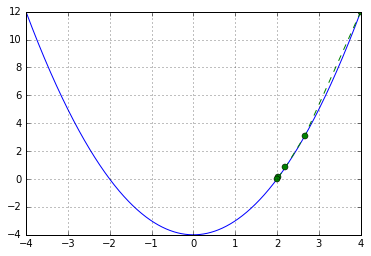

In [4]:
x_trial = 4
x_previous = 5
f_trial = f(x_trial)
f_previous = f(x_previous)
lista_x = []
lista_y = []
while(abs(f_trial) > dokladnosc):
    print(x_trial, f_trial)
    lista_x.append(x_trial)
    lista_y.append(f_trial)
    fprime_trial = (f_trial - f_previous)/(x_trial - x_previous)
    delta_x = -f_trial/fprime_trial
    x_previous = x_trial
    f_previous = f_trial
    x_trial = x_trial + delta_x
    f_trial = f(x_trial)

print(x_trial, f_trial)
plt.plot(x,y)
plt.grid()
plt.plot(lista_x, lista_y, 'go--')